In [2]:
!pip install tensorflow

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 48)          │           1,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 128)         │          55,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,690 (1.78 MB)

 Trainable params: 467,690 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 55ms/step - accuracy: 0.9112 - loss: 0.2879
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 52ms/step - accuracy: 0.9812 - loss: 0.0633
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 50ms/step - accuracy: 0.9854 - loss: 0.0494
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9837 - loss: 0.0539
Precisión en el test: 0.9868000149726868
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


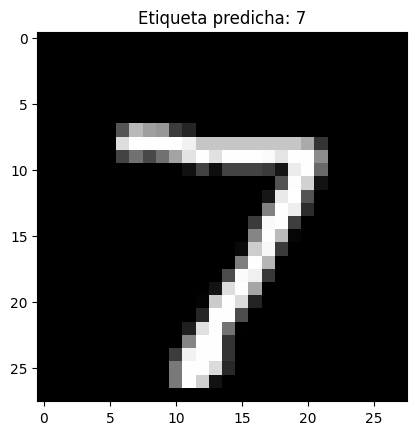

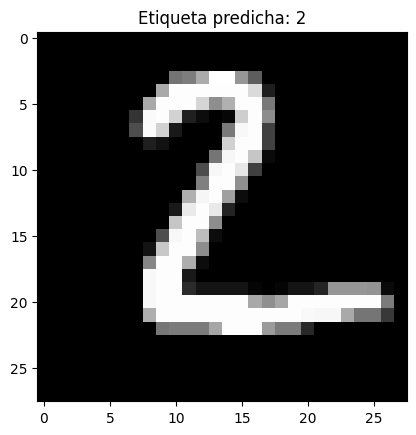

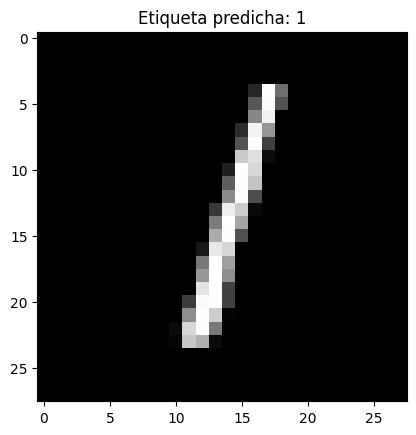

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construcción del modelo CNN ajustado
model = models.Sequential([
    layers.Conv2D(48, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Nueva capa de Dropout para reducir sobreajuste
    layers.Dense(10, activation='softmax')
])
model.summary()

# Compilación del modelo con optimizador RMSprop
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con más épocas y tamaño de lote menor
model.fit(train_images, train_labels, epochs=3, batch_size=32)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el test: {test_acc}')

# Predicción y visualización de tres imágenes de prueba
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta predicha: {np.argmax(predictions[i])}')
    plt.show()